In [462]:

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.pyplot import xticks

warnings.filterwarnings('ignore')
%matplotlib inline

# Data display customization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# 1.Understanding and Preparing the Data for Processing

In [463]:
ld_data = pd.read_csv('Leads.csv')
ld_data.head() 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [464]:
ld_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [465]:
ld_data.shape

(9240, 37)

In [466]:
ld_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data cleaning

#### Checking null values

In [467]:
# Converting 'Select' values to NaN.
ld_data = ld_data.replace('Select', np.nan)

In [468]:
# Checking if null values are present
ld_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [469]:
round(100*(ld_data.isnull().sum()/len(ld_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [470]:
# Dropping columns with more than 70% null values
ld_data = ld_data.drop(ld_data.loc[:,list(round(100*(ld_data.isnull().sum()/len(ld_data.index)), 2)>70)].columns, 1)

In [471]:
ld_data.shape

(9240, 35)

In [472]:
round(100*(ld_data.isnull().sum()/len(ld_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

From above we can conclude that thethe highest percentage of null values now is present in Lead Quality.

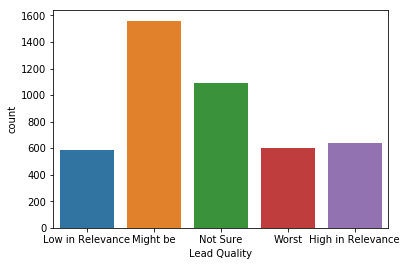

In [473]:
# Plotting the count of unique values in 'Lead Quality' column
sns.countplot(ld_data['Lead Quality'])

From the above graph we can see that there is not much variance in the data as per above plot, hence we will impute the null values as 'Not sure'.

In [474]:
ld_data['Lead Quality'] = ld_data['Lead Quality'].replace(np.nan, 'Not Sure')

In [475]:
# Checking the null values again
round(100*(ld_data.isnull().sum()/len(ld_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Since we have brought down the Null values of Lead quality. The next highest percentage of null values are present in the following columns - Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score and Asymmetrique Profile Score. Visualizing these over in an plot

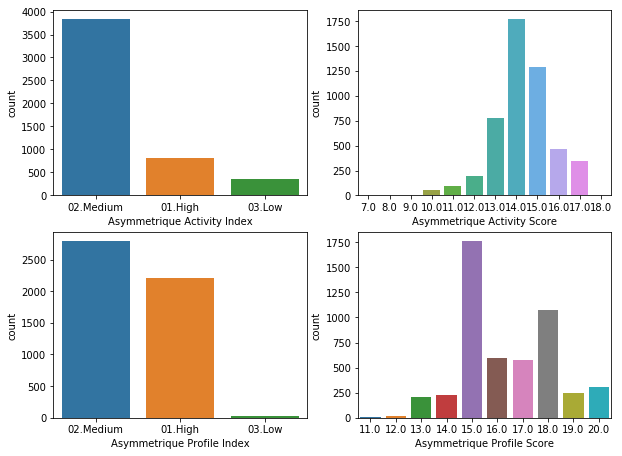

In [476]:
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(ld_data['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.countplot(ld_data['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(ld_data['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.countplot(ld_data['Asymmetrique Profile Score'], ax = axs[1,1])

The above diagrams suggests a huge variance for all the columns we will not impute null values as it will affect the model we have built. So to move it out of the equation we will remove all these columns

In [477]:
#Dropping columns
ld_data = ld_data.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [478]:
ld_data.shape

(9240, 31)

In [479]:
# Verifying  the null values again
round(100*(ld_data.isnull().sum()/len(ld_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

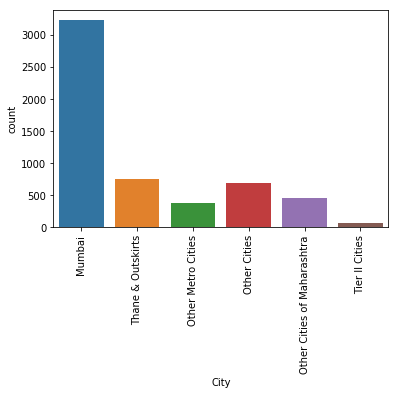

In [480]:
# Analyzing column - 'City'
sns.countplot(ld_data.City)
xticks(rotation = 90)

City being a categorical variable can be imputed with 'Mumbai' as the value as it is the mode of the column

In [481]:
ld_data['City'] = ld_data['City'].replace(np.nan, 'Mumbai')

In [482]:
# Finding the null values again
round(100*(ld_data.isnull().sum()/len(ld_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

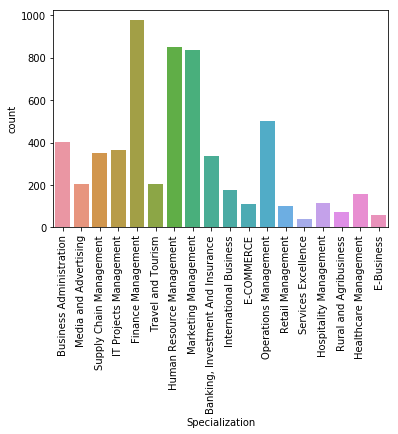

In [483]:
# Analyzing column Specialization
sns.countplot(ld_data.Specialization)
xticks(rotation = 90)

Null values in Specialization can occur due to many reasons like customers forgeting to provide or infact people having no specializations. Hence we will define a new category - 'Not mentioned' and replace all the null values with it.

In [484]:
ld_data['Specialization'] = ld_data['Specialization'].replace(np.nan, 'Not mentioned')

In [485]:
# Rechecking the null values
round(100*(ld_data.isnull().sum()/len(ld_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

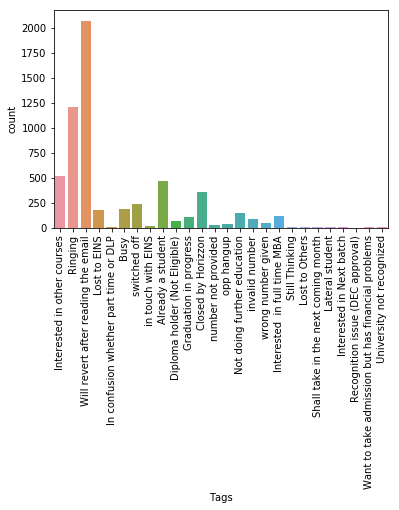

In [486]:
# Analyzing column Tags
sns.countplot(ld_data.Tags)
xticks(rotation = 90)

Like Cities Tag also can be replaced by the mode ie 'Will revert after reading the email' as most of the elements have that value.

In [487]:
ld_data['Tags'] = ld_data['Tags'].replace(np.nan, 'Will revert after reading the email')

In [488]:
# Rechecking the null values
round(100*(ld_data.isnull().sum()/len(ld_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

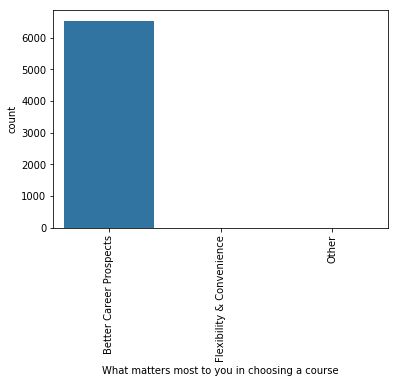

In [489]:
# Analyzing column 'What matters most to you in choosing a course'
sns.countplot(ld_data['What matters most to you in choosing a course'])
xticks(rotation = 90)

In [490]:
##Here since all the values are 'Better Career Prospects' we will replace with the mode

In [491]:
#Replacing null values with mode value
ld_data['What matters most to you in choosing a course'] = ld_data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

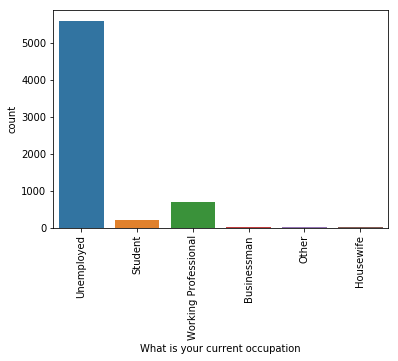

In [492]:
# Analyzing column - 'What is your current occupation'
sns.countplot(ld_data['What is your current occupation'])
xticks(rotation = 90)

In [493]:
##Here since most of the values are 'Unemployed' we will replace with the mode

In [494]:
ld_data['What is your current occupation'] = ld_data['What is your current occupation'].replace(np.nan, 'Unemployed')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

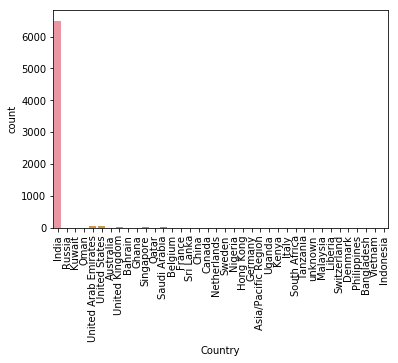

In [495]:
# Analyzing column - 'Country'
sns.countplot(ld_data.Country)
xticks(rotation = 90)

In [496]:
##Here since most of the values are 'India' we will replace with the mode
ld_data['Country'] = ld_data['Country'].replace(np.nan, 'India')

In [497]:
# Finding the null values again
round(100*(ld_data.isnull().sum()/len(ld_data.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [498]:
# Dropping the rows having null values since it is less than 2%
ld_data.dropna(inplace = True)

In [499]:
ld_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 31 columns):
Prospect ID                                      9074 non-null object
Lead Number                                      9074 non-null int64
Lead Origin                                      9074 non-null object
Lead Source                                      9074 non-null object
Do Not Email                                     9074 non-null object
Do Not Call                                      9074 non-null object
Converted                                        9074 non-null int64
TotalVisits                                      9074 non-null float64
Total Time Spent on Website                      9074 non-null int64
Page Views Per Visit                             9074 non-null float64
Last Activity                                    9074 non-null object
Country                                          9074 non-null object
Specialization                                   9074 

####  Finding outliers in all columns

In [500]:
# Checking for outliers in all the continuous variables
num_ld = ld_data[['Lead Number','Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [501]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_ld.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
90%,650276.800000,1.000000,7.000000,1373.000000,5.000000
95%,655344.450000,1.000000,10.000000,1557.000000,6.000000
99%,659563.350000,1.000000,17.000000,1839.000000,9.000000


As we can see, there is a gradual increase in the values in columns - 'Lead Number', 'Converted', 'Total Time Spent on Website', hence we can conclude that there will no outliers in these columns. Let's plot boxplots for other columns to check the spread of values.

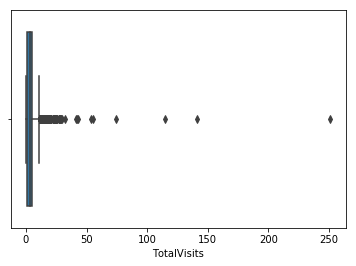

In [502]:
sns.boxplot(ld_data['TotalVisits'])

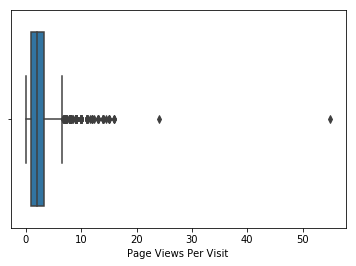

In [503]:
sns.boxplot(ld_data['Page Views Per Visit'])

In [504]:
# Removing outliers from these two columns
Q1 = ld_data['TotalVisits'].quantile(0.05)
Q2 = ld_data['TotalVisits'].quantile(0.95)
ld_data = ld_data[(ld_data['TotalVisits'] >= Q1) & (ld_data['TotalVisits'] <= Q2)]

Q3 = ld_data['Page Views Per Visit'].quantile(0.05)
Q4 = ld_data['Page Views Per Visit'].quantile(0.95)
ld_data = ld_data[(ld_data['Page Views Per Visit'] >= Q3) & (ld_data['Page Views Per Visit'] <= Q4)]

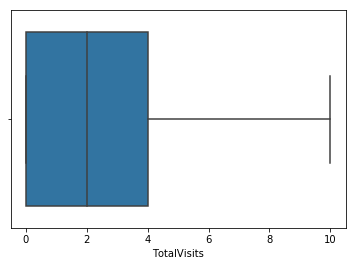

In [505]:
#Plotting Total Visits
sns.boxplot(ld_data['TotalVisits'])

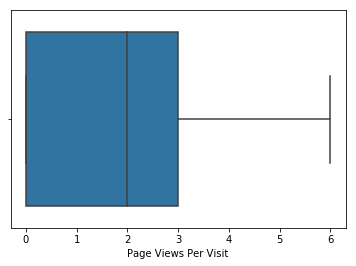

In [506]:
#Plotting Page Views Per Visit
sns.boxplot(ld_data['Page Views Per Visit'])

In [507]:
#Describing the dataset again
ld_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000
mean,617000.027472,0.374778,2.754174,468.572054,2.071957
std,23289.142312,0.484094,2.330357,541.698874,1.649040
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596376.000000,0.000000,0.000000,0.000000,0.000000
50%,615473.000000,0.000000,2.000000,233.000000,2.000000
75%,637048.000000,1.000000,4.000000,886.000000,3.000000
max,660737.000000,1.000000,10.000000,2272.000000,6.000000


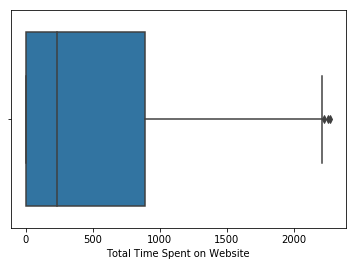

In [508]:
#Plotting Total time spent on Website
sns.boxplot(ld_data['Total Time Spent on Website'])

In [509]:
# Removing outliers
Q1 = ld_data['Total Time Spent on Website'].quantile(0.05)
Q2 = ld_data['Total Time Spent on Website'].quantile(0.95)
ld_data = ld_data[(ld_data['Total Time Spent on Website'] >= Q1) & (ld_data['Total Time Spent on Website'] <= Q2)]

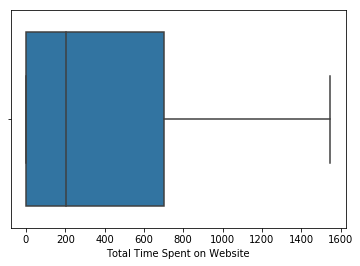

In [510]:
# Plotting Total time Spent on Website
sns.boxplot(ld_data['Total Time Spent on Website'])

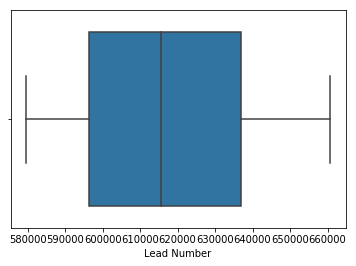

In [511]:
#Plotting Lead Number
sns.boxplot(ld_data['Lead Number'])

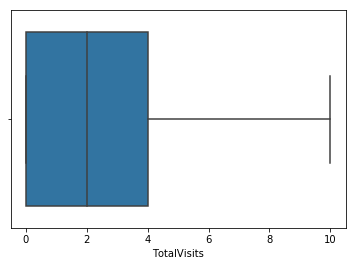

In [512]:
#Plotting TotalVisits
sns.boxplot(ld_data['TotalVisits'])

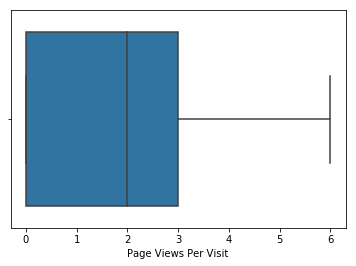

In [513]:
#Plotting Page Views Per Visit
sns.boxplot(ld_data['Page Views Per Visit'])

Since we have cleaned the data and removed the outliers lets deal with dummy variable creation.

### Creating dummy variables

#### Converting binary variables to 0/1

In [514]:
ld_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8023 entries, 0 to 9239
Data columns (total 31 columns):
Prospect ID                                      8023 non-null object
Lead Number                                      8023 non-null int64
Lead Origin                                      8023 non-null object
Lead Source                                      8023 non-null object
Do Not Email                                     8023 non-null object
Do Not Call                                      8023 non-null object
Converted                                        8023 non-null int64
TotalVisits                                      8023 non-null float64
Total Time Spent on Website                      8023 non-null int64
Page Views Per Visit                             8023 non-null float64
Last Activity                                    8023 non-null object
Country                                          8023 non-null object
Specialization                                   8023 

In [515]:
# List of variables to map

varlist =  ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the lead dataset
ld_data[varlist] = ld_data[varlist].apply(binary_map)

In [516]:
ld_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8023 entries, 0 to 9239
Data columns (total 31 columns):
Prospect ID                                      8023 non-null object
Lead Number                                      8023 non-null int64
Lead Origin                                      8023 non-null object
Lead Source                                      8023 non-null object
Do Not Email                                     8023 non-null int64
Do Not Call                                      8023 non-null int64
Converted                                        8023 non-null int64
TotalVisits                                      8023 non-null float64
Total Time Spent on Website                      8023 non-null int64
Page Views Per Visit                             8023 non-null float64
Last Activity                                    8023 non-null object
Country                                          8023 non-null object
Specialization                                   8023 no

#### Creating dummy variables for others

In [517]:
# Creating dummy variables for the remaining categorical variables.

# Creating dummy variables for the variable 'Lead Origin'
lo = pd.get_dummies(ld_data['Lead Origin'], prefix='Lead Origin')
ld_data = pd.concat([ld_data,lo], axis=1)

# Creating dummy variables for the variable 'Lead Source'
ls = pd.get_dummies(ld_data['Lead Source'], prefix='Lead Source')
ld_data = pd.concat([ld_data,ls], axis=1)

# Creating dummy variables for the variable 'Last Activity'
la = pd.get_dummies(ld_data['Last Activity'], prefix='Last Activity')
ld_data = pd.concat([ld_data,la], axis=1)

# Creating dummy variables for the variable 'Country'
co = pd.get_dummies(ld_data['Country'], prefix='Country')
ld_data = pd.concat([ld_data,co], axis=1)

# Creating dummy variables for the variable 'Specialization'
sp = pd.get_dummies(ld_data['Specialization'], prefix='Specialization')
ld_data = pd.concat([ld_data,sp], axis=1)

# Creating dummy variables for the variable 'What is your current occupation'
wco = pd.get_dummies(ld_data['What is your current occupation'], prefix='What is your current occupation')
ld_data = pd.concat([ld_data,wco], axis=1)

# Creating dummy variables for the variable 'What matters most to you in choosing a course'
wm = pd.get_dummies(ld_data['What matters most to you in choosing a course'], prefix='What matters most to you in choosing a course')
ld_data = pd.concat([ld_data,wm], axis=1)

# Creating dummy variables for the variable 'Tags'
ta = pd.get_dummies(ld_data['Tags'], prefix='Tags')
ld_data = pd.concat([ld_data,ta], axis=1)

# Creating dummy variables for the variable 'Lead Quality'
lq = pd.get_dummies(ld_data['Lead Quality'], prefix='Lead Quality')
ld_data = pd.concat([ld_data,lq], axis=1)

# Creating dummy variables for the variable 'City'
c = pd.get_dummies(ld_data['City'], prefix='City')
ld_data = pd.concat([ld_data,c], axis=1)

# Creating dummy variables for the variable 'Last Notable Activity'
lna = pd.get_dummies(ld_data['Last Notable Activity'], prefix='Last Notable Activity')
# Adding the results to the master dataframe
ld_data = pd.concat([ld_data,lna], axis=1)

#### Dropping the original columns

In [518]:
# Dropping the columns for which we have created dummy variables
ld_data = ld_data.drop(['Lead Origin','Lead Source','Last Activity','Country','Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags',
       'Lead Quality', 'City', 'Last Notable Activity'], 1)

In [519]:
ld_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8023 entries, 0 to 9239
Columns: 181 entries, Prospect ID to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(17), object(1), uint8(161)
memory usage: 2.5+ MB


Now all the columns, except Prospect ID are numeric. Lets proceed with test and train data split.

# 2. Model Building

### Test-train splitting of data

In [520]:
from sklearn.model_selection import train_test_split

In [521]:
# Putting feature variable to X
X = ld_data.drop(['Prospect ID','Converted','Lead Number'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,...,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [522]:
# Putting response variable to y
y = ld_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [523]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

###  Feature scaling

In [524]:
from sklearn.preprocessing import StandardScaler

In [525]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,...,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
404,0,0,0.976287,2.010255,0.271617,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2627,0,0,-1.165442,-0.865285,-1.235486,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5311,0,0,-1.165442,-0.865285,-1.235486,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9171,0,0,0.976287,1.464455,1.778719,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8345,0,0,-1.165442,-0.865285,-1.235486,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [526]:
# Checking the Converted Rate
converted = (sum(ld_data['Converted'])/len(ld_data['Converted'].index))*100
converted

35.88433254393618

We have a conversion rate of around 36%.

### Correlation check

In [527]:
# Create correlation matrix
corr_matrix = ld_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
to_drop

['Lead Origin_Landing Page Submission',
 'Lead Source_Facebook',
 'Lead Source_Reference',
 'Last Notable Activity_Email Marked Spam',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_Resubscribed to emails',
 'Last Notable Activity_SMS Sent',
 'Last Notable Activity_Unsubscribed']

In [528]:
# Dropping the highly correlated dummy variables
X_test = X_test.drop(to_drop,1)
X_train = X_train.drop(to_drop,1)

### Building Model

In [529]:
import statsmodels.api as sm

In [530]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5616
Model:                            GLM   Df Residuals:                     5471
Model Family:                Binomial   Df Model:                          144
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 06 Jan 2020   Deviance:                          nan
Time:                        21:11:30   Pearson chi2:                 2.93e+18
No. Iterations:                   100   Covariance Type:             nonrobust
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                            -3.731e+14   5.03e+06  -7.42e+07      0.000   -3.73e+14   -3.73e+14
Do Not Call                                                              4.116e+15   6.74e+07    6.1e+07      0.000    4.12e+15    4.12e+15
TotalVisits                                                                6.3e+13   1.59e+06   3.97e+07      0.000     6.3e+13     6.3e+13
Total Time Spent on Website                                              2.862e+14   1.11e+06   2.57e+08      0.000    2.86e+14    2.86e+14
Page Views Per Visit                                                    -9.019e+13   1.72e+06  -5.24e+07      0.000   -9.02e+13   -9.02e+13
Search                                                                   2.576e+14   2.88e+07   8.94e+06      0.000    2.58e+14    2.58e+14
Magazine                                                                 -147.8514   1.92e-06   -7.7e+07      0.000    -147.851    -147.851
Newspaper Article                                                          62.5983   1.18e-06   5.31e+07      0.000      62.598      62.598
X Education Forums                                                         54.6936    5.7e-07    9.6e+07      0.000      54.694      54.694
Newspaper                                                                  40.7126   9.03e-07   4.51e+07      0.000      40.713      40.713
Digital Advertisement                                                    1.536e+14   4.83e+07   3.18e+06      0.000    1.54e+14    1.54e+14
Through Recommendations                                                  4.663e+14   4.98e+07   9.36e+06      0.000    4.66e+14    4.66e+14
Receive More Updates About Our Courses                                     73.7139   1.05e-06   6.99e+07      0.000      73.714      73.714
Update me on Supply Chain Content                                          -6.3833   9.85e-07  -6.48e+06      0.000      -6.383      -6.383
Get updates on DM Content                                                 -21.5451   6.07e-07  -3.55e+07      0.000     -21.545     -21.545
I agree to pay the amount through cheque                                   84.1255   1.24e-06   6.79e+07      0.000      84.125      84.125
A free copy of Mastering The Interview                                  -1.381e+14   3.02e+06  -4.58e+07      0.000   -1.38e+14   -1.38e+14
Lead Origin_API                                                          1.151e+14   3.89e+06   2.96e+07      0.000    1.15e+14    1.15e+14
Lead Origin_Lead Add Form                                                4.579e+15   4.89e+07   9.36e+07      0.000    4.58e+15    4.58e+15
Lead Origin_Lead Import                                                  4.285e+15

###  Feature selection using RFE

In [531]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [532]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [533]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True,  True, False,
       False, False,

In [534]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 8),
 ('Do Not Call', False, 38),
 ('TotalVisits', False, 81),
 ('Total Time Spent on Website', False, 13),
 ('Page Views Per Visit', False, 82),
 ('Search', False, 36),
 ('Magazine', False, 142),
 ('Newspaper Article', False, 141),
 ('X Education Forums', False, 147),
 ('Newspaper', False, 146),
 ('Digital Advertisement', False, 99),
 ('Through Recommendations', False, 116),
 ('Receive More Updates About Our Courses', False, 155),
 ('Update me on Supply Chain Content', False, 154),
 ('Get updates on DM Content', False, 144),
 ('I agree to pay the amount through cheque', False, 140),
 ('A free copy of Mastering The Interview', False, 72),
 ('Lead Origin_API', False, 29),
 ('Lead Origin_Lead Add Form', False, 10),
 ('Lead Origin_Lead Import', False, 58),
 ('Lead Source_Click2call', False, 76),
 ('Lead Source_Direct Traffic', False, 45),
 ('Lead Source_Google', False, 47),
 ('Lead Source_Live Chat', False, 87),
 ('Lead Source_NC_EDM', False, 33),
 ('Lead Source_Ol

In [535]:
col = X_train.columns[rfe.support_]

In [536]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       ...
       'City_Tier II Cities', 'Last Notable Activity_Approached upfront',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=155)

#### Assessing the model

In [537]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5616
Model:                            GLM   Df Residuals:                     5600
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1365.4
Date:                Mon, 06 Jan 2020   Deviance:                       2730.9
Time:                        21:11:35   Pearson chi2:                 2.57e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5806      0.292     -8.824      0.000      -3.154      -2.007
Lead Source_Welingak Website                             4.7504      1.026      4.631      0.000       2.740       6.761
Last Activity_SMS Sent                                   2.0079      0.108     18.631      0.000       1.797       2.219
What is your current occupation_Working Professional     1.5420      0.300      5.135      0.000       0.953       2.131
Tags_Busy                                                4.1971      0.357     11.769      0.000       3.498       4.896
Tags_Closed by Horizzon                                  9.7049      1.067      9.095      0.000       7.613      11.796
Tags_Lost to EINS                                        9.5277      0.663     14.378      0.000       8.229      10.826
Tags_Ringing                                            -0.5135      0.364     -1.412      0.158      -1.226       0.199
Tags_Will revert after reading the email                 4.1886      0.278     15.076      0.000       3.644       4.733
Tags_switched off                                       -1.5509      0.667     -2.325      0.020      -2.859      -0.243
Lead Quality_High in Relevance                           1.4515      0.369      3.938      0.000       0.729       2.174
Lead Quality_Low in Relevance                            1.4896      0.298      4.999      0.000       0.906       2.074
Lead Quality_Not Sure                                   -2.7022      0.158    -17.140      0.000      -3.011      -2.393
Lead Quality_Worst                                      -2.8942      0.901     -3.214      0.001      -4.659      -1.129
Last Notable Activity_Modified                          -1.7211      0.115    -14.953      0.000      -1.947      -1.495
Last Notable Activity_Olark Chat Conversation           -1.6575      0.449     -3.692      0.000      -2.537      -0.778
========================================================================================================================
"""

In [538]:
# Dropping the column with high p-value and re-running the model
col = col.drop('Tags_Ringing', 1)
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_High in Relevance', 'Lead Quality_Low in Relevance',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [539]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5616
Model:                            GLM   Df Residuals:                     5601
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1366.4
Date:                Mon, 06 Jan 2020   Deviance:                       2732.8
Time:                        21:11:35   Pearson chi2:                 2.53e+04
No. Iterations:                     9   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8932      0.204    -14.160      0.000      -3.294      -2.493
Lead Source_Welingak Website                             4.7499      1.025      4.632      0.000       2.740       6.760
Last Activity_SMS Sent                                   1.9938      0.107     18.621      0.000       1.784       2.204
What is your current occupation_Working Professional     1.5765      0.302      5.214      0.000       0.984       2.169
Tags_Busy                                                4.4912      0.298     15.085      0.000       3.908       5.075
Tags_Closed by Horizzon                                  9.9713      1.053      9.467      0.000       7.907      12.036
Tags_Lost to EINS                                        9.7877      0.640     15.282      0.000       8.532      11.043
Tags_Will revert after reading the email                 4.4730      0.205     21.859      0.000       4.072       4.874
Tags_switched off                                       -1.2329      0.631     -1.953      0.051      -2.470       0.005
Lead Quality_High in Relevance                           1.5552      0.374      4.160      0.000       0.822       2.288
Lead Quality_Low in Relevance                            1.5998      0.297      5.390      0.000       1.018       2.182
Lead Quality_Not Sure                                   -2.6746      0.155    -17.231      0.000      -2.979      -2.370
Lead Quality_Worst                                      -2.6205      0.903     -2.901      0.004      -4.391      -0.850
Last Notable Activity_Modified                          -1.7062      0.115    -14.871      0.000      -1.931      -1.481
Last Notable Activity_Olark Chat Conversation           -1.6563      0.449     -3.686      0.000      -2.537      -0.776
========================================================================================================================
"""

In [540]:
# Dropping the column with high p-value and re-running the model
col = col.drop('Tags_switched off', 1)
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email',
       'Lead Quality_High in Relevance', 'Lead Quality_Low in Relevance',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [541]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5616
Model:                            GLM   Df Residuals:                     5602
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1368.9
Date:                Mon, 06 Jan 2020   Deviance:                       2737.8
Time:                        21:11:35   Pearson chi2:                 2.23e+04
No. Iterations:                     9   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.0475      0.197    -15.503      0.000      -3.433      -2.662
Lead Source_Welingak Website                             4.7479      1.025      4.631      0.000       2.739       6.757
Last Activity_SMS Sent                                   1.9851      0.107     18.569      0.000       1.776       2.195
What is your current occupation_Working Professional     1.5793      0.301      5.248      0.000       0.989       2.169
Tags_Busy                                                4.6272      0.294     15.733      0.000       4.051       5.204
Tags_Closed by Horizzon                                 10.0909      1.053      9.584      0.000       8.027      12.154
Tags_Lost to EINS                                        9.9061      0.640     15.488      0.000       8.653      11.160
Tags_Will revert after reading the email                 4.6042      0.200     22.977      0.000       4.211       4.997
Lead Quality_High in Relevance                           1.6193      0.379      4.273      0.000       0.876       2.362
Lead Quality_Low in Relevance                            1.6660      0.300      5.549      0.000       1.078       2.254
Lead Quality_Not Sure                                   -2.6504      0.154    -17.185      0.000      -2.953      -2.348
Lead Quality_Worst                                      -2.5108      0.909     -2.761      0.006      -4.293      -0.729
Last Notable Activity_Modified                          -1.6966      0.115    -14.793      0.000      -1.921      -1.472
Last Notable Activity_Olark Chat Conversation           -1.6563      0.449     -3.685      0.000      -2.537      -0.775
========================================================================================================================
"""

In [542]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

404     0.465079
2627    0.971853
5311    0.250921
9171    0.709181
8345    0.057852
1763    0.000614
9053    0.250921
7095    0.709181
109     0.000614
697     0.709181
dtype: float64

In [543]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([4.65079135e-01, 9.71853402e-01, 2.50921426e-01, 7.09181034e-01,
       5.78516998e-02, 6.14283151e-04, 2.50921426e-01, 7.09181034e-01,
       6.14283151e-04, 7.09181034e-01])

#### Creating new dataframe with Converted flag and the predicted probabilities

In [544]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,1,0.465079,404
1,1,0.971853,2627
2,0,0.250921,5311
3,1,0.709181,9171
4,0,0.057852,8345


#### Creating new column 'predicted' with values as '1' if Converted_Prob > 0.5 else '0'

In [545]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,1,0.465079,404,0
1,1,0.971853,2627,1
2,0,0.250921,5311,0
3,1,0.709181,9171,1
4,0,0.057852,8345,0


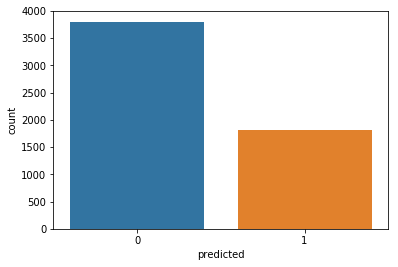

In [546]:
sns.countplot(y_train_pred_final['predicted'])

In [547]:
from sklearn import metrics

In [548]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3459  147]
 [ 342 1668]]


In [549]:
# Predicted     not_churn    churn
# Actual
# not_churn        3459      147
# churn            342       1668  

In [550]:
# Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9129273504273504


### Checking VIF scores

In [551]:
# Importing VIF module
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [552]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.37
3,Tags_Busy,1.08
5,Tags_Lost to EINS,1.06
12,Last Notable Activity_Olark Chat Conversation,1.06
0,Lead Source_Welingak Website,1.05
2,What is your current occupation_Working Profes...,0.49
10,Lead Quality_Worst,0.38
7,Lead Quality_High in Relevance,0.32
6,Tags_Will revert after reading the email,0.18
8,Lead Quality_Low in Relevance,0.17


all the variables have very less VIF, hence we can proceed with this model.

# Metrics Evaluation

In [553]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [554]:
# Calculate the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8298507462686567

In [555]:
# Calculate the specificity
TN / float(TN+FP)

0.959234608985025

In [556]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.04076539101497504


In [557]:
# Calculate positive predictive value 
print (TP / float(TP+FP))

0.9190082644628099


In [558]:
# Calculate negative predictive value
print (TN / float(TN+ FN))

0.9100236779794791


## Plotting ROC curve

We will now plot the ROC curve to visualize the trade-off between sensitivity and specificity.

In [559]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [560]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

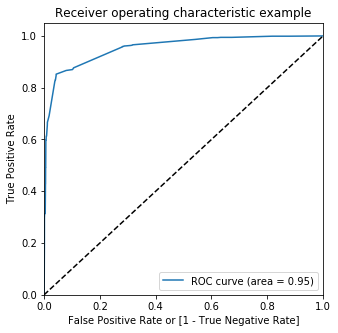

In [561]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [562]:
# Now we find the optimal cutoff point where sensitivity and specificity are balanced
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.465079,404,0,1,1,1,1,1,0,0,0,0,0
1,1,0.971853,2627,1,1,1,1,1,1,1,1,1,1,1
2,0,0.250921,5311,0,1,1,1,0,0,0,0,0,0,0
3,1,0.709181,9171,1,1,1,1,1,1,1,1,1,0,0
4,0,0.057852,8345,0,1,0,0,0,0,0,0,0,0,0


In [563]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.357906  1.000000  0.000000
0.1   0.1  0.800570  0.961194  0.711037
0.2   0.2  0.802528  0.959701  0.714920
0.3   0.3  0.901353  0.866667  0.920688
0.4   0.4  0.917557  0.847264  0.956739
0.5   0.5  0.912927  0.829851  0.959235
0.6   0.6  0.913283  0.829851  0.959789
0.7   0.7  0.913105  0.826368  0.961453
0.8   0.8  0.874288  0.673134  0.986412
0.9   0.9  0.851496  0.596517  0.993622


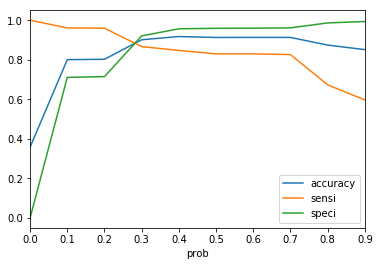

In [564]:
# plotting accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From above plot, we can take 0.3 as the optimum cutoff.

In [565]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.465079,404,0,1,1,1,1,1,0,0,0,0,0,1
1,1,0.971853,2627,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.250921,5311,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.709181,9171,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.057852,8345,0,1,0,0,0,0,0,0,0,0,0,0


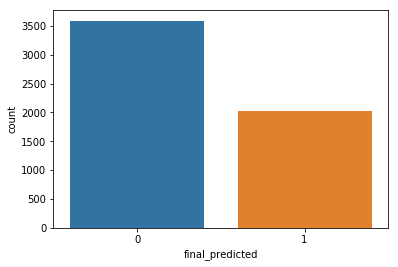

In [566]:
sns.countplot(y_train_pred_final['final_predicted'])

#### Assigning lead score

In [567]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.465079,404,0,1,1,1,1,1,0,0,0,0,0,1,47
1,1,0.971853,2627,1,1,1,1,1,1,1,1,1,1,1,1,97
2,0,0.250921,5311,0,1,1,1,0,0,0,0,0,0,0,0,25
3,1,0.709181,9171,1,1,1,1,1,1,1,1,1,0,0,1,71
4,0,0.057852,8345,0,1,0,0,0,0,0,0,0,0,0,0,6


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

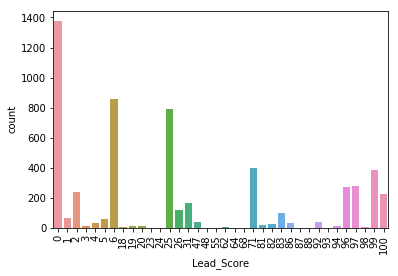

In [568]:
sns.countplot(y_train_pred_final['Lead_Score'])
xticks(rotation=90)

In [569]:
# Checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9013532763532763

In [570]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3320,  286],
       [ 268, 1742]])

In [571]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [572]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.8666666666666667

In [573]:
# Specificity
TN / float(TN+FP)

0.920687742651137

In [574]:
# False postive rate
print(FP/ float(TN+FP))

0.079312257348863


In [575]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8589743589743589


In [576]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9253065774804905


## Precision and Recall

In [577]:
#Analyzing the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3459,  147],
       [ 342, 1668]])

#### Precision = TP / TP + FP

In [578]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9190082644628099

#### Recall = TP / TP + FN

In [579]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8298507462686567

Calculating the precision score

In [580]:
from sklearn.metrics import precision_score, recall_score

In [581]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9190082644628099

In [582]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8298507462686567

### Precision and recall tradeoff

In [583]:
from sklearn.metrics import precision_recall_curve

In [584]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

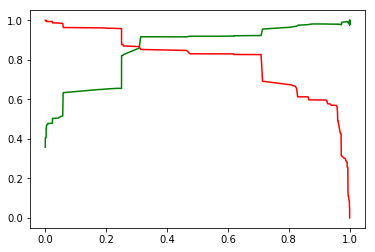

In [585]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [586]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [587]:
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Will revert after reading the email,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
7084,0,0,0,0,0,0,1,0,0,1,0,0,0
3989,0,0,0,0,0,0,1,0,0,1,0,1,0
7897,0,1,0,0,0,0,1,0,0,0,0,0,0
2952,0,1,0,0,0,0,1,1,0,0,0,0,0
2364,0,0,0,0,0,0,1,0,0,1,0,0,0


In [588]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set

In [589]:
y_test_pred = res.predict(X_test_sm)

In [590]:
y_test_pred[:10]

7084    0.250921
3989    0.057852
7897    0.971853
2952    0.994297
2364    0.250921
1912    0.000614
946     0.308922
1707    0.057852
4247    0.250921
89      0.000614
dtype: float64

In [591]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
7084,0.250921
3989,0.057852
7897,0.971853
2952,0.994297
2364,0.250921


In [592]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [593]:
y_test_df['Prospect ID'] = y_test_df.index

In [594]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [595]:
# Concatenating y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [596]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7084,0.250921
1,0,3989,0.057852
2,1,7897,0.971853
3,1,2952,0.994297
4,1,2364,0.250921


In [597]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [598]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [599]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,7084,0,0.250921
1,3989,0,0.057852
2,7897,1,0.971853
3,2952,1,0.994297
4,2364,1,0.250921


In [600]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [601]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,7084,0,0.250921,0
1,3989,0,0.057852,0
2,7897,1,0.971853,1
3,2952,1,0.994297,1
4,2364,1,0.250921,0


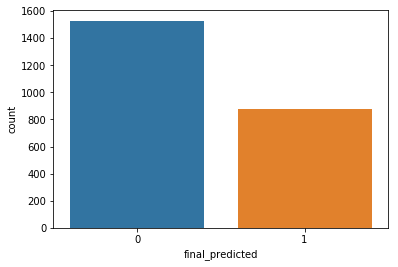

In [602]:
sns.countplot(y_pred_final['final_predicted'])

In [603]:
# Checking the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9102617366015787

In [604]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1425,  113],
       [ 103,  766]])

In [605]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [606]:
# Sensitivity of the model
TP / float(TP+FN)

0.8814729574223246

In [607]:
# Specificity of the model
TN / float(TN+FP)

0.9265279583875162